# SyriaTel Customer Churn Prediction

## 1. Business Understanding
## 2. Data Understanding
## 3. Data Preparation
## 4. Modeling
## 5. Evaluation
## 6. Final Model and Interpretation
## 7. Recommendations


  
  ## 1. Business Understanding

**Business Problem:**
SyriaTel, a telecommunications company, is experiencing customer churn, which results in revenue loss. The goal of this project is to build a machine learning model to predict which customers are at risk of churning.

**Stakeholder:**
The business team at SyriaTel, particularly the customer retention and marketing departments.

**Objective:**
Use customer data to build a classifier that predicts churn, helping SyriaTel proactively retain customers at risk.

**Success Criteria:**
- High recall on churners: Better at catching those likely to leave.
- Balance with precision to avoid unnecessary retention efforts.
- Actionable recommendations based on model insights.


    

## 2. Data Understanding
**importing libraries and loading data**

In [24]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')  # loading the csv file
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [25]:
import os
os.listdir()


['.git',
 'bigml_59c28831336c6604c800002a.csv',
 'customer_churn_modeling_phase3.ipynb']

In [26]:
df.shape

(3333, 21)

In [27]:
df.info()
df.describe()
df['churn'].value_counts()  # Target distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

churn
False    2850
True      483
Name: count, dtype: int64

In [28]:
print(df.columns.tolist())


['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [29]:
# Convert categorical variables to category type
categorical_cols = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'churn']

for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols


['state',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'churn']

In [30]:
# Handle outliers using IQR
numeric_cols = ['account length', 'number vmail messages', 
                'total day minutes', 'total day calls', 'total day charge',
                'total eve minutes', 'total eve calls', 'total eve charge',
                'total night minutes', 'total night calls', 'total night charge',
                'total intl minutes', 'total intl calls', 'total intl charge',
                'customer service calls']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

numeric_cols


['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [31]:
# One-hot encode categorical variables (excluding 'churn' as it's the target)
categorical_cols_to_encode = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Ensure churn is numeric (if it's not already)
df_encoded['churn'] = df_encoded['churn'].astype(int)

# Preview the transformed data
print(df_encoded.head())       # View the first few rows
print(df_encoded.columns)      # Check the column names


   account length  number vmail messages  total day minutes  total day calls  \
0           128.0                     25              265.1            110.0   
1           107.0                     26              161.6            123.0   
2           137.0                      0              243.4            114.0   
3            84.0                      0              299.4             71.0   
4            75.0                      0              166.7            113.0   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07             197.40             99.0             16.78   
1             27.47             195.50            103.0             16.62   
2             41.38             121.20            110.0             10.30   
3             50.90              63.55             88.0              5.40   
4             28.34             148.30            122.0             12.61   

   total night minutes  total night calls  ...  phone nu

In [32]:
# Assuming df_encoded is the DataFrame after one-hot encoding

# Separate numerical and binary/categorical columns
numerical_cols = ['account length', 'number vmail messages', 
                  'total day minutes', 'total day calls', 'total day charge',
                  'total eve minutes', 'total eve calls', 'total eve charge',
                  'total night minutes', 'total night calls', 'total night charge',
                  'total intl minutes', 'total intl calls', 'total intl charge',
                  'customer service calls']

# Binary/categorical columns = all other columns except numerical and target ('churn')
binary_cols = [col for col in df_encoded.columns if col not in numerical_cols and col != 'churn']

print("Numerical columns:")
print(numerical_cols)

print("\nBinary/Categorical columns:")
print(binary_cols)


Numerical columns:
['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

Binary/Categorical columns:
['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_415', 'area code_510'

In [33]:
# Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")
numerical_summary = df_encoded[numerical_cols].describe()
print(numerical_summary)

Summary Statistics for Numerical Columns:
       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.003300               8.098710         179.816157   
std         39.644112              13.687436          54.152190   
min          1.000000               0.000000          34.650000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        206.500000              50.000000         325.450000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.473597         30.569292         201.009541       100.134113   
std          19.863740          9.205865          50.401365        19.758567   
min          46.500000          5.

In [34]:
#Summary Statistics for Binary (One-Hot Encoded) Columns
print("\nSummary Statistics for Binary Columns (Proportion of 1s):")
binary_summary = df_encoded[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)


Summary Statistics for Binary Columns (Proportion of 1s):
area code_415             0.496550
voice mail plan_yes       0.276628
area code_510             0.252025
international plan_yes    0.096910
state_WV                  0.031803
                            ...   
phone number_422-2571     0.000300
phone number_422-3052     0.000300
phone number_327-1319     0.000300
phone number_327-3053     0.000300
phone number_409-5749     0.000300
Length: 3386, dtype: float64


#### Key Observations

49.65% of customers in your dataset have area code 415.

About 27.66% of users have a voicemail plan.

About 9.69% of users are on an international plan.

About 3.18% of customers are from West Virginia.

phone number_422-2571 = 0.0003(Only one customer (0.03%) in the dataset has this exact phone number.)

#### Insights:
Skewed binary features:

Features like international plan_yes are heavily imbalanced (fewer users have them), which can affect model learning—models may learn to treat them as rare "signals."

Sparse dummy columns:

Many one-hot encoded phone numbers appear only once (~0.0003 = 1/3333). This is not useful for modeling—phone numbers are unique identifiers and should ideally be dropped.

Multicollinearity:

For area code and state, one-hot encoding has created many binary columns, potentially introducing redundant information. This can affect some algorithms like logistic regression.

In [36]:
# Summary Statistics for Target Variable (churn)
print("\nSummary Statistics for Target Variable (churn):")
df_encoded['churn'].value_counts(normalize=True)




Summary Statistics for Target Variable (churn):


churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

0 → Customer did not churn

1 → Customer churned

In [37]:
# Save the cleaned and encoded dataset to CSV
df_encoded.to_csv("cleaned_churn_data.csv", index=False)
print("Cleaned data saved to 'cleaned_churn_data.csv'")


Cleaned data saved to 'cleaned_churn_data.csv'


## 2. Exploratory Data Analysis(EDA)

In [38]:
# Load the cleaned dataset
df_encoded = pd.read_csv("cleaned_churn_data.csv")

# Display the first few rows
df_encoded.head()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128.0,25,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91,...,False,False,False,False,False,False,False,False,False,True
1,107.0,26,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103,...,False,False,False,False,False,False,False,False,False,True
2,137.0,0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104,...,False,False,False,False,False,False,False,False,False,False
3,84.0,0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89,...,False,False,False,False,False,False,False,False,True,False
4,75.0,0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121,...,False,False,False,False,False,False,False,False,True,False


In [39]:
# Summary statistics
print("EDA Summary Statistics:")
df_encoded.describe(include='all')

EDA Summary Statistics:


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3332,3332,3332,3332,3332,3332,3332,3332,3010,2411
mean,101.003300,8.098710,179.816157,100.473597,30.569292,201.009541,100.134113,17.086016,200.828143,100.098410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39.644112,13.687436,54.152190,19.863740,9.205865,50.401365,19.758567,4.284135,50.118622,19.443717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,34.650000,46.500000,5.890000,63.550000,46.500000,5.400000,64.550000,48.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


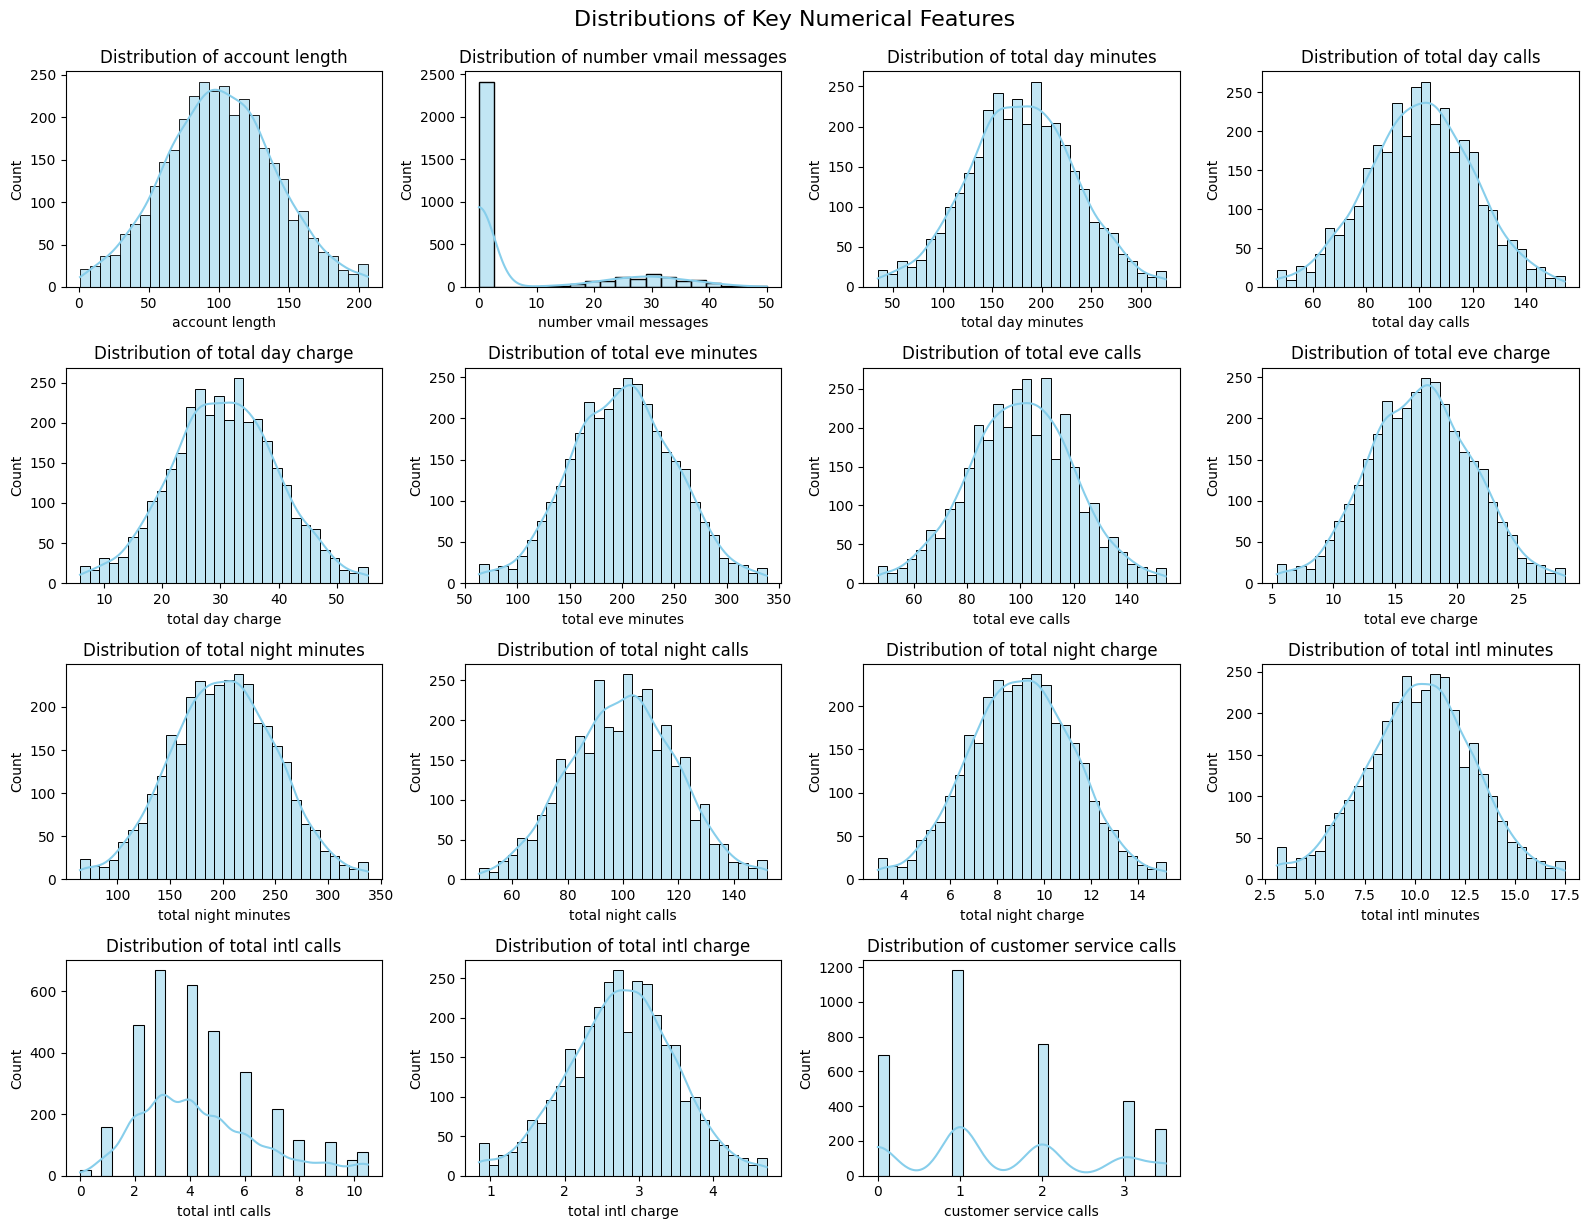

In [42]:
# Plot distributions of numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_encoded[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
   # plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Distributions of Key Numerical Features", fontsize=16, y=1.02)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10700\3839123997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_encoded, palette='Set2')


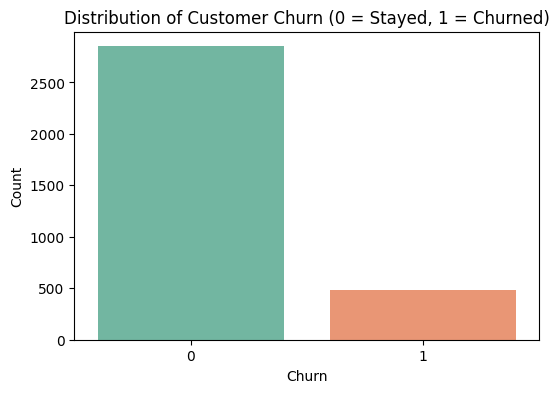

In [43]:
# Visualize Distribution of Churn Status
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_encoded, palette='Set2')
plt.title('Distribution of Customer Churn (0 = Stayed, 1 = Churned)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


This indicates that a substantial majority of customers did not churn, highlighting a potential class imbalance that could impact predictive modeling efforts for churn prediction.